<a href="https://colab.research.google.com/github/msiam71/LiverDiasease/blob/main/liverDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/liverDetection/Liver Patient Dataset (LPD)_train.csv', encoding='latin1')
# Display the first 5 rows of the dataset
df.head()


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [ ]:
# Check shape and basic info
print("Shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
df.head()



Shape: (27158, 11)

Column names: ['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']

Missing values:
 Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [96]:
# Fix column names (remove spaces and hidden characters)
df.columns = [col.strip().replace("\xa0","").replace(" ","_") for col in df.columns]
df.head()


,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Result
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,0.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,0.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,0.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,0.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


In [97]:
# Fill categorical with mode, numeric with median
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print("Missing values after cleanup:\n", df.isnull().sum())


Missing values after cleanup:
 Age_of_the_patient                      0
Gender_of_the_patient                   0
Total_Bilirubin                         0
Direct_Bilirubin                        0
Alkphos_Alkaline_Phosphotase            0
Sgpt_Alamine_Aminotransferase           0
Sgot_Aspartate_Aminotransferase         0
Total_Protiens                          0
ALB_Albumin                             0
A/G_Ratio_Albumin_and_Globulin_Ratio    0
Result                                  0
dtype: int64


/tmp/ipython-input-209046387.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
# Encode Gender (Male=1, Female=0)
df["Gender_of_the_patient"] = df["Gender_of_the_patient"].replace({"Male": 1, "Female": 0})

# Encode target (1 = disease, 2 = healthy → make binary 1/0)
df["Result"] = df["Result"].map({1:1, 2:0})

df.head()

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Result
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,0.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,0.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,0.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,0.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


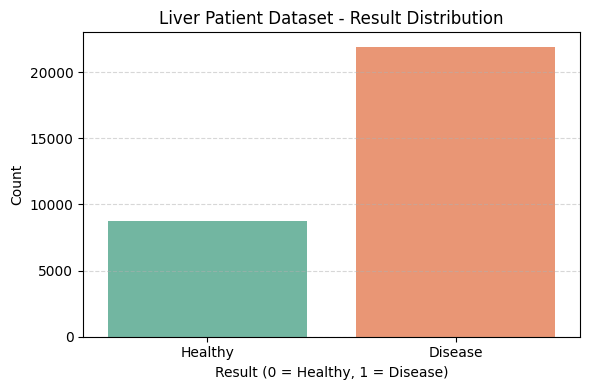

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class balance for the 'Result' column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Result', hue='Result', palette='Set2', legend=False)
plt.title('Liver Patient Dataset - Result Distribution')
plt.xlabel('Result (0 = Healthy, 1 = Disease)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Healthy', 'Disease'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1676049202.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender_of_the_patient"] = df["Gender_of_the_patient"].replace({"Male": 1, "Female": 0})


Class distribution in y after re-encoding and removing NaNs:
 Result
1    21917
0     8774
Name: count, dtype: int64
KNN Accuracy: 0.9439945249230067

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      4384
           1       0.95      0.93      0.94      4383

    accuracy                           0.94      8767
   macro avg       0.94      0.94      0.94      8767
weighted avg       0.94      0.94      0.94      8767



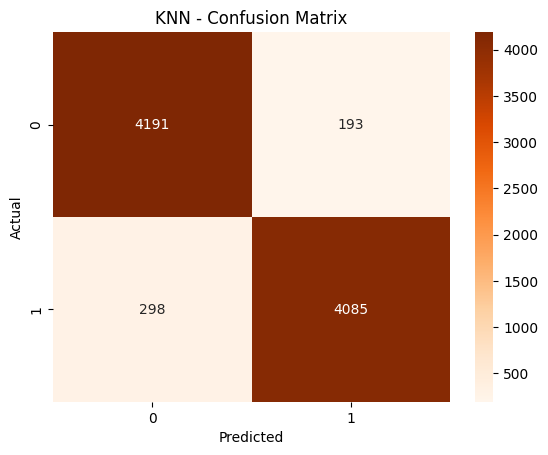

Shape of predict_proba output: (8767, 2)
Classes the model was trained on: [0 1]


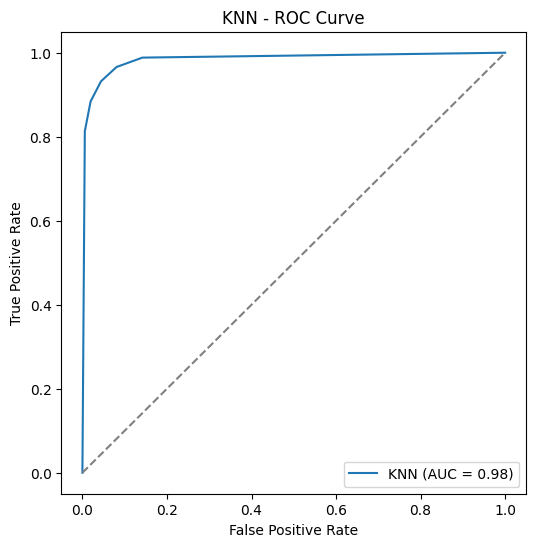

KNN does not provide feature importance directly.


In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

# Re-load the original data
df = pd.read_csv('/content/drive/MyDrive/liverDetection/Liver Patient Dataset (LPD)_train.csv', encoding='latin1')

# Fix column names (remove spaces and hidden characters)
df.columns = [col.strip().replace("\xa0","").replace(" ","_") for col in df.columns]

# Encode Gender (Male=1, Female=0)
df["Gender_of_the_patient"] = df["Gender_of_the_patient"].replace({"Male": 1, "Female": 0})

# Encode target (1 = disease, 2 = healthy → make binary 1/0)
df["Result"] = df["Result"].map({1:1, 2:0})

# Convert Gender_of_the_patient to numeric, coercing errors to NaN
df['Gender_of_the_patient'] = pd.to_numeric(df['Gender_of_the_patient'], errors='coerce')

# Fill categorical with mode, numeric with median
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


# Redefine features and target
X = df.drop('Result', axis=1)
y = df["Result"]

# Remove rows with NaN values in either X or y
nan_rows = X.isnull().any(axis=1) | y.isnull()
X = X[~nan_rows]
y = y[~nan_rows]


# Check the distribution of classes in y after re-encoding and removing NaNs
print("Class distribution in y after re-encoding and removing NaNs:\n", y.value_counts())

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res # Stratify to maintain class distribution
)

# Create a pipeline to handle imputation and scaling
pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')), # Impute NaN values (should be none after cleaning)
    ('scaler', StandardScaler()),                  # Scale features
    ('knn', KNeighborsClassifier(n_neighbors=5))   # KNN model
])


# Train model
pipeline.fit(X_train, y_train)

# Predictions
y_pred_knn = pipeline.predict(X_test)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="Oranges")
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_pred_prob_knn = pipeline.predict_proba(X_test)
print("Shape of predict_proba output:", y_pred_prob_knn.shape)
print("Classes the model was trained on:", pipeline.classes_)

# Access the probability for the positive class (assuming it's the second column)
y_pred_prob_knn = y_pred_prob_knn[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(6,6))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN - ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Feature importance is not directly available for KNN
print("KNN does not provide feature importance directly.")

/tmp/ipython-input-3678210770.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender_of_the_patient"] = df["Gender_of_the_patient"].replace({"Male": 1, "Female": 0})


Class distribution in y after re-encoding and removing NaNs:
 Result
1    21917
0     8774
Name: count, dtype: int64
Decision Tree Accuracy: 0.9929280255503593

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4384
           1       0.99      0.99      0.99      4383

    accuracy                           0.99      8767
   macro avg       0.99      0.99      0.99      8767
weighted avg       0.99      0.99      0.99      8767



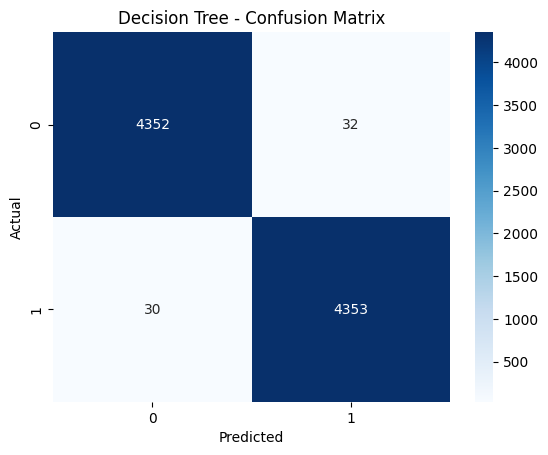

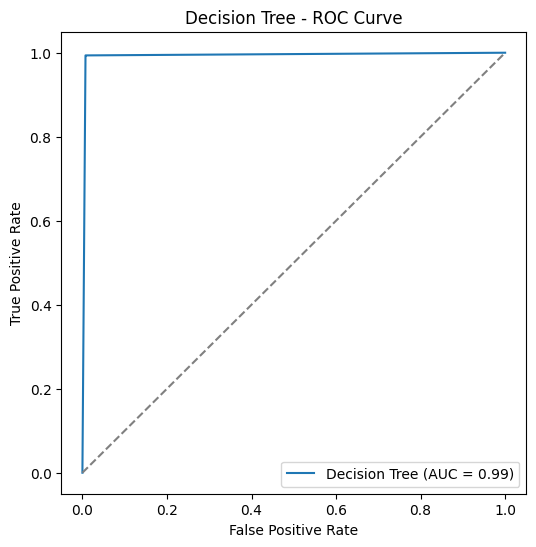

/tmp/ipython-input-3678210770.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_dt, y=feature_names, palette="viridis")


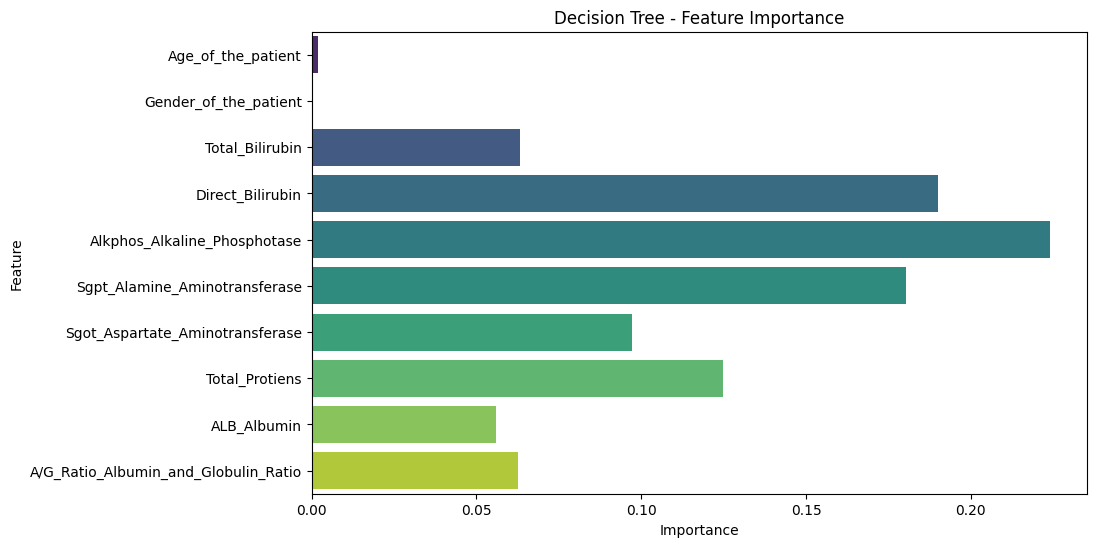

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
import pandas as pd

# Re-load the original data
df = pd.read_csv('/content/drive/MyDrive/liverDetection/Liver Patient Dataset (LPD)_train.csv', encoding='latin1')

# Fix column names (remove spaces and hidden characters)
df.columns = [col.strip().replace("\xa0","").replace(" ","_") for col in df.columns]

# Encode Gender (Male=1, Female=0)
df["Gender_of_the_patient"] = df["Gender_of_the_patient"].replace({"Male": 1, "Female": 0})

# Encode target (1 = disease, 2 = healthy → make binary 1/0)
df["Result"] = df["Result"].map({1:1, 2:0})

# Convert Gender_of_the_patient to numeric, coercing errors to NaN
df['Gender_of_the_patient'] = pd.to_numeric(df['Gender_of_the_patient'], errors='coerce')

# Fill categorical with mode, numeric with median
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


# Redefine features and target
X = df.drop('Result', axis=1)
y = df["Result"]

# Remove rows with NaN values in either X or y
nan_rows = X.isnull().any(axis=1) | y.isnull()
X = X[~nan_rows]
y = y[~nan_rows]

# Check the distribution of classes in y after re-encoding and removing NaNs
print("Class distribution in y after re-encoding and removing NaNs:\n", y.value_counts())

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res # Stratify to maintain class distribution
)

# Create a pipeline to handle imputation and scaling
pipeline_dt = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')), # Impute NaN values
    ('scaler', StandardScaler()),                  # Scale features
    ('dt', DecisionTreeClassifier(random_state=42))   # Decision Tree model
])


# Train model
pipeline_dt.fit(X_train, y_train)

# Predictions
y_pred_dt = pipeline_dt.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_pred_prob_dt = pipeline_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(6,6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Feature importance
importances_dt = pipeline_dt.named_steps['dt'].feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances_dt, y=feature_names, palette="viridis")
plt.title("Decision Tree - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

/tmp/ipython-input-2248620361.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender_of_the_patient"] = df["Gender_of_the_patient"].replace({"Male": 1, "Female": 0})


Class distribution in y after re-encoding and removing NaNs:
 Result
1    21917
0     8774
Name: count, dtype: int64
Random Forest Accuracy: 0.9986312307516825

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4384
           1       1.00      1.00      1.00      4383

    accuracy                           1.00      8767
   macro avg       1.00      1.00      1.00      8767
weighted avg       1.00      1.00      1.00      8767



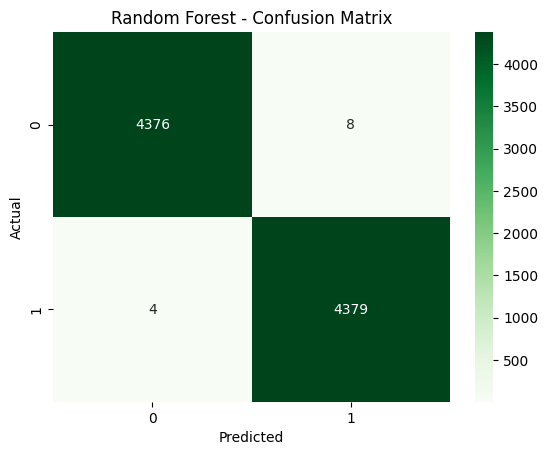

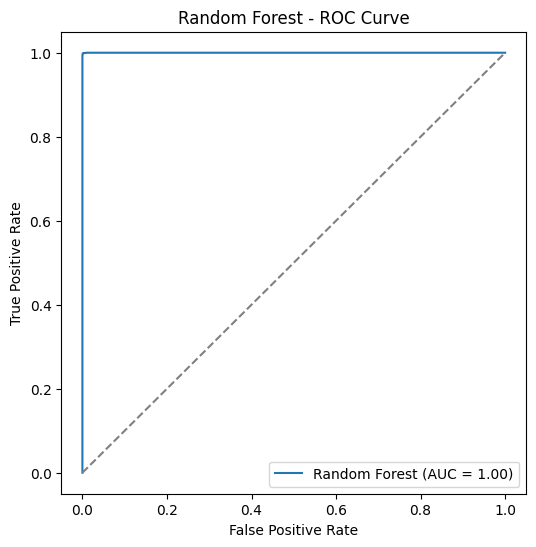

/tmp/ipython-input-2248620361.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_rf, y=feature_names, palette="viridis")


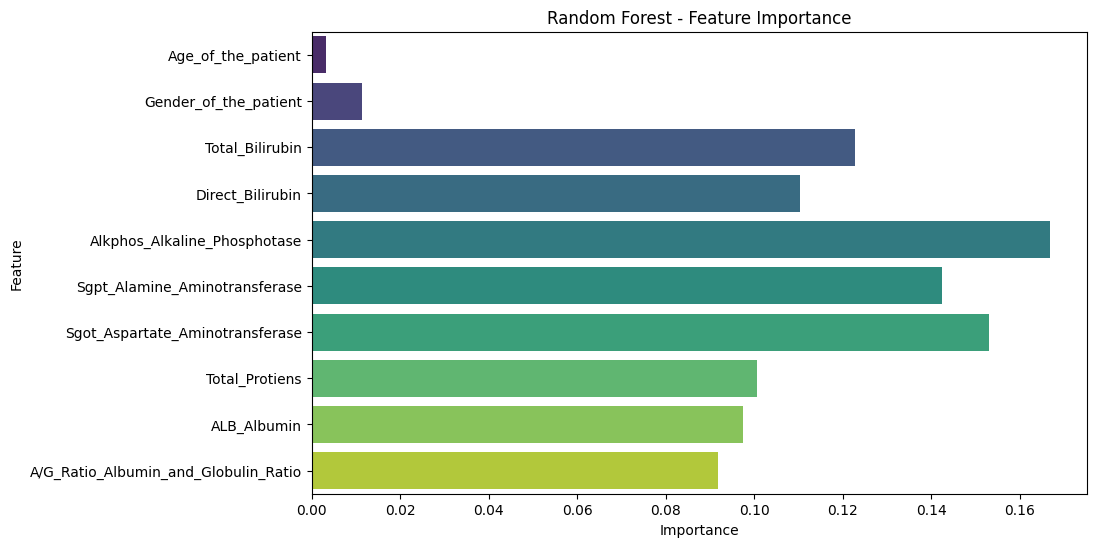

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
import pandas as pd

# Re-load the original data
df = pd.read_csv('/content/drive/MyDrive/liverDetection/Liver Patient Dataset (LPD)_train.csv', encoding='latin1')

# Fix column names (remove spaces and hidden characters)
df.columns = [col.strip().replace("\xa0","").replace(" ","_") for col in df.columns]

# Encode Gender (Male=1, Female=0)
df["Gender_of_the_patient"] = df["Gender_of_the_patient"].replace({"Male": 1, "Female": 0})

# Encode target (1 = disease, 2 = healthy → make binary 1/0)
df["Result"] = df["Result"].map({1:1, 2:0})

# Convert Gender_of_the_patient to numeric, coercing errors to NaN
df['Gender_of_the_patient'] = pd.to_numeric(df['Gender_of_the_patient'], errors='coerce')

# Fill categorical with mode, numeric with median
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


# Redefine features and target
X = df.drop('Result', axis=1)
y = df["Result"]

# Remove rows with NaN values in either X or y
nan_rows = X.isnull().any(axis=1) | y.isnull()
X = X[~nan_rows]
y = y[~nan_rows]

# Check the distribution of classes in y after re-encoding and removing NaNs
print("Class distribution in y after re-encoding and removing NaNs:\n", y.value_counts())

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res # Stratify to maintain class distribution
)

# Create a pipeline to handle imputation and scaling
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')), # Impute NaN values
    ('scaler', StandardScaler()),                  # Scale features
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))   # Random Forest model
])


# Train model
pipeline_rf.fit(X_train, y_train)

# Predictions
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_pred_prob_rf = pipeline_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6,6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Feature importance
importances_rf = pipeline_rf.named_steps['rf'].feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances_rf, y=feature_names, palette="viridis")
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()